In [8]:
import numpy as np
import pandas as pd

def read_table(filepath):
    df = pd.read_csv(filepath)
    df.fillna(0, inplace=True) # NaN 채우기
    df.set_index('channel', inplace=True)

    # linear 혹은 첫번째 나오는 모델의 결과 값으로 sort
    df.sort_values(by=[df.columns[0]], ascending=False, inplace=True)
    return df

In [14]:
df = read_table('res/result_LB_201908.csv')
df

,linear,time_decay,first_touch,pos_based,last_touch,shapley,markov
channel,,,,,,,
d,0.877049,0.877455,0.875921,0.877115,0.878349,0.866578,0.862845
a,0.087003,0.086758,0.087607,0.086863,0.086127,0.095123,0.097114
e,0.035948,0.035787,0.036471,0.036022,0.035524,0.038300,0.040041
b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


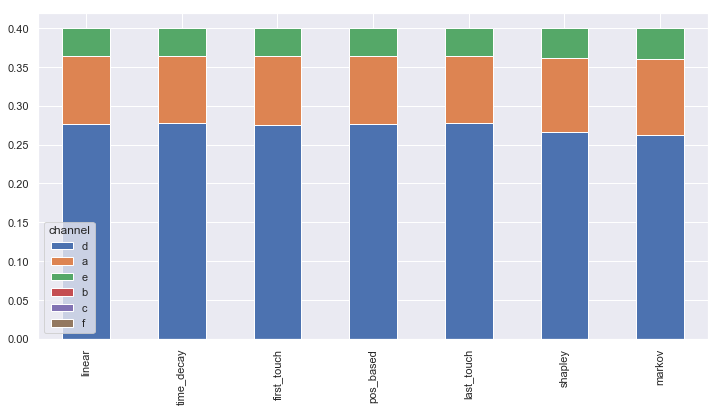

In [17]:
import seaborn as sns
sns.set()

# 윗부분 10%만 보기
temp = df.copy()
temp.loc['d',:] = temp.loc['d',:].apply(lambda x: x-0.6)

temp.T.plot(kind='bar', stacked=True, figsize=(12,6))
# 샤플리만 bar 크기가 큰 것은 아마 소수점 반올림 때문에 생긴 오차인듯

In [30]:
from math import log

df.applymap(lambda x: log(x) if x != 0 else 0) # 자연로그 취하기

,linear,time_decay,first_touch,pos_based,last_touch,shapley,markov
channel,,,,,,,
d,-3.233152,-3.637654,-2.542811,-3.233786,0.0,-2.441077,-2.628814
direct,-0.047109,-0.031205,-0.096046,-0.047075,0.0,-0.107955,-0.088939
a,-5.416200,-5.815496,-4.746734,-5.419807,0.0,-4.570479,-4.735962
e,-6.146949,-6.551480,-5.459896,-6.143218,0.0,-5.316074,-5.482240
b,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
c,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
f,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
